# Predicting Cardiovascular Disease Using Machine Learning
Cardiovascular disease is the leading cause of death worldwide. It is a combination of different cardiovascular conditions such as heart disease, heart attack, stroke, heart failure, arrhythmia, heart valve problems, etc. High blood pressure, high cholesterol, diabetes, and physical inactivity are among the main causes of increased risk for this disease. By reducing behavioral risk factors such as smoking, unhealthy diet, alcohol use, and lack of physical activity, this disease can be prevented.

If people can be aware of this disease in advance before it turns to a more serious level, we can greatly reduce the number of deaths and patients at risk. With the help of advances in machine learning and higher computing power, it has led to the advancement of AI in medicine, where people can use these techniques and come up with a model and make predictions to determine the likelihood of people developing this disease in the early stage

In this project, a machine learning model is proposed and implemented to determine whether or not a person is likely to have this disease by focusing on factors such as factual information, medical examination results, and patient information collected from an online dataset. The K Neighbors Nearest algorithm, which is a well-known and well-performing classification algorithm, was used to implement this model.

KNN is a simple algorithm but works incredibly well in practice as it stores all available cases and classifies the new data or case based on a similarity measure. It is suggested that if the new point added to the sample is similar to the neighborhood points, then this point will belong to a certain class of neighborhood points. In general, the KNN algorithm is used in search applications where people search for similar items. In the KNN algorithm, K indicates the number of nearest neighbors of the new point that should be predicted.del.

### Importing libraries and loading the dataset

In [1]:
import pandas as pd
# turning off the warning that Pandas generates when you perform certain operations that involve chained assignments.
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cardiovascular.csv')
df.drop(columns='id', inplace=True)

new_column_names = {
    'age_days': 'Age_Days',
    'age_year': 'Age_Years',
    'gender': 'Gender',
    'height': 'Height',
    'weight': 'Weight',
    'ap_hi': 'Systolic_BP',
    'ap_lo': 'Diastolic_BP',
    'cholesterol': 'Cholesterol',
    'gluc': 'Glucose',
    'smoke': 'Smoking',
    'alco': 'Alcohol',
    'active': 'Physical_Activity',
    'cardio': 'Cardiovascular_Disease'
}

df.rename(columns=new_column_names, inplace=True)

df.head()

,Age_Days,Age_Years,Gender,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Cardiovascular_Disease
0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


## Data Overview

In [3]:
df.shape

(70000, 13)

In [4]:
df.isnull().sum()

Age_Days                  0
Age_Years                 0
Gender                    0
Height                    0
Weight                    0
Systolic_BP               0
Diastolic_BP              0
Cholesterol               0
Glucose                   0
Smoking                   0
Alcohol                   0
Physical_Activity         0
Cardiovascular_Disease    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age_Days                70000 non-null  int64  
 1   Age_Years               70000 non-null  float64
 2   Gender                  70000 non-null  int64  
 3   Height                  70000 non-null  int64  
 4   Weight                  70000 non-null  float64
 5   Systolic_BP             70000 non-null  int64  
 6   Diastolic_BP            70000 non-null  int64  
 7   Cholesterol             70000 non-null  int64  
 8   Glucose                 70000 non-null  int64  
 9   Smoking                 70000 non-null  int64  
 10  Alcohol                 70000 non-null  int64  
 11  Physical_Activity       70000 non-null  int64  
 12  Cardiovascular_Disease  70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [6]:
df.describe()

,Age_Days,Age_Years,Gender,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Cardiovascular_Disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data visualization

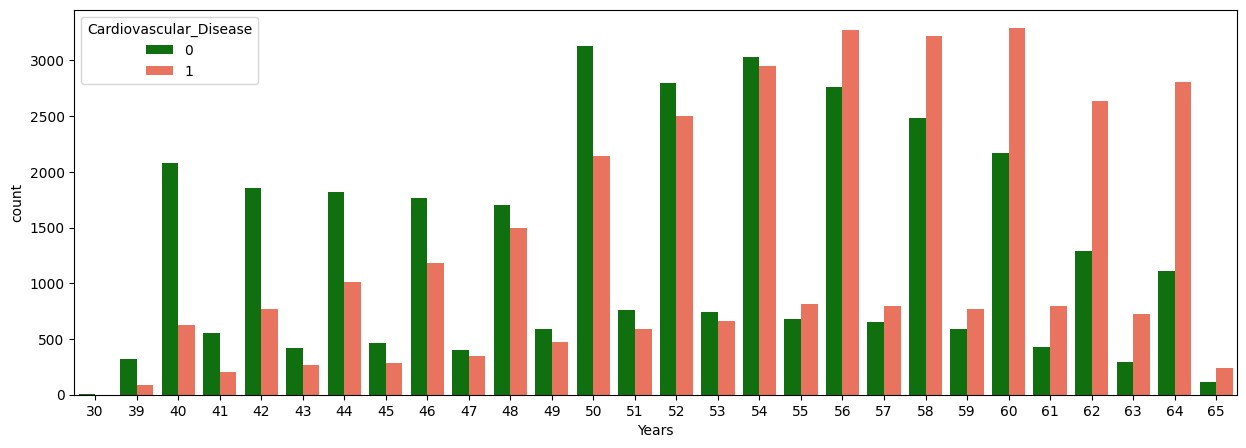

In [7]:
plt.figure(figsize=(15,5))
df['Years'] = (df['Age_Years']).round().astype('int')
sns.countplot(x='Years', hue='Cardiovascular_Disease', data = df, palette=["#008000", "#FF6347"])
plt.show()

According to the graph, it can be seen that people between the ages of 56 and 60 are more susceptible to the disease.

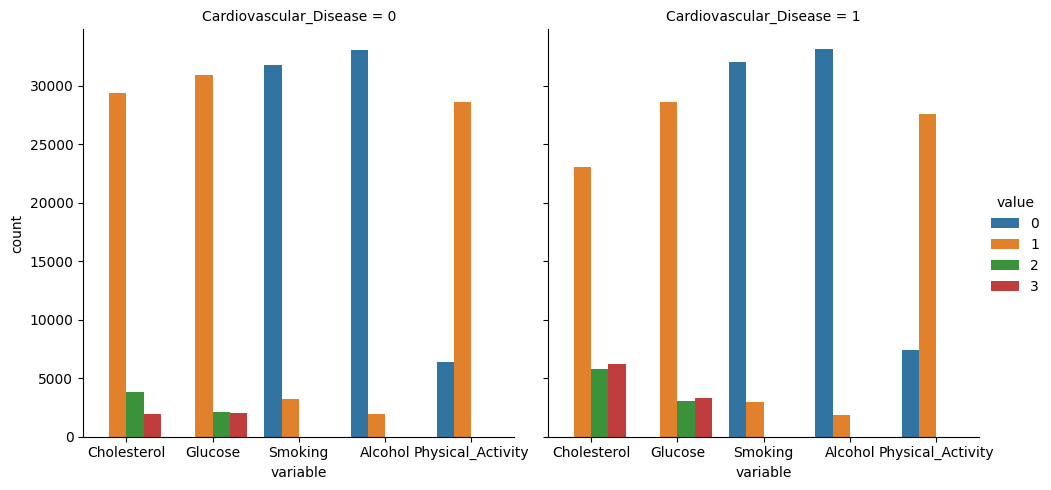

In [8]:
# melt function to transform a DataFrame from a wide format to a long format.
df_double = pd.melt(df, id_vars=['Cardiovascular_Disease'], value_vars=['Cholesterol','Glucose', 'Smoking', 'Alcohol', 'Physical_Activity'])
sns.catplot(x="variable", hue="value", col="Cardiovascular_Disease", data=df_double, kind="count")
plt.show()

The first bar chart represents the distribution of categorical data among people with cardiovascular disease while the second bar chart represents the distribution of categorical data among people without the disease. The above bivariate analysis shows that people with cardiovascular diseases have higher cholesterol and glucose levels than others.

## Features selection and Data cleaning

In [9]:
df["BMI"] = df["Weight"] / (df["Height"]/100)**2

In [10]:
df.describe()

,Age_Days,Age_Years,Gender,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Cardiovascular_Disease,Years,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513
std,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511
min,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068
75%,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222
max,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667


In [11]:
# calculate the 97.5th percentile and the 2.5th percentile of the 'Height' column.
# selects the rows in the DataFrame where the condition is True, meaning the 'Height' falls outside the desired percentile range.
# removes the selected rows from the original DataFrame df in place, effectively filtering the DataFrame.
df.drop(df[(df['Height'] > df['Height'].quantile(0.975)) | 
          (df['Height'] < df['Height'].quantile(0.025))].index,inplace=True)

df.drop(df[(df['Weight'] > df['Weight'].quantile(0.975)) | 
          (df['Weight'] < df['Weight'].quantile(0.025))].index,inplace=True)

In order to come up with an accurate data set, corrupt or unwanted records are detected and removed by cleaning data. As you can see in the previous described function, the maximum height is 250 cm, the maximum weight is 200 kg, and the maximum BMI value derived from height and weight is 298, which have inappropriate values when looking at and comparing them to each other. Therefore, irrelevant data were removed and the dataset generalized by removing outliers as shown in the above code.

In [12]:
df.drop(df[(df['Systolic_BP'] > df['Systolic_BP'].quantile(0.975)) | 
          (df['Systolic_BP'] < df['Systolic_BP'].quantile(0.025))].index,inplace=True)

df.drop(df[(df['Diastolic_BP'] > df['Diastolic_BP'].quantile(0.975)) | 
          (df['Diastolic_BP'] < df['Diastolic_BP'].quantile(0.025))].index,inplace=True)


Furthermore, diastolic blood pressure (lo_ap) cannot exceed systolic blood pressure (hi_ap) because systolic pressure is the maximum pressure exerted by the heart during a beat and diastolic pressure is the amount of pressure in the arteries between beats. Also, the numerical difference between systolic blood pressure and diastolic blood pressure is known as blood pressure and cannot be a negative value. By considering these extreme facts of hi_ap and lo_ap were removed to eliminate inaccurate blood pressure data.

In [13]:
df.shape

(60142, 15)

In [14]:
df.describe()

,Age_Days,Age_Years,Gender,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Cardiovascular_Disease,Years,BMI
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,19468.719979,53.338959,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228,53.338798,27.170628
std,2460.510296,6.741124,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,6.746864,4.404588
min,10798.000000,29.583562,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,16.049383
25%,17677.250000,48.430822,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,19705.000000,53.986301,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.259585
75%,21321.000000,58.413699,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.752066
max,23713.000000,64.967123,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,46.666667


## Data standardization and Modeling
In order to ensure that the data is internally consistent so that the data can be easily compared with each other, data standardization was performed on only the numeric data in the data set.

In [15]:
x = df.drop(columns=['Cardiovascular_Disease', 'Years', 'Height', 'Weight'])
y = df['Cardiovascular_Disease']

scaler =  StandardScaler()

X = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

Accuracy:  0.631682370131506


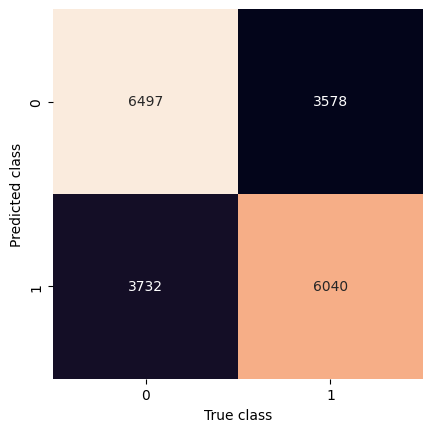

In [16]:
conmat = confusion_matrix(y_test,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True class')
plt.ylabel('Predicted class')
print('Accuracy: ', knn.score(X_test, y_test))

We need to choose a better k

## Choosing the best K value
I will use the elbow method to select a good K value by focusing on both accuracy and error rate.

A list is created to store the precision values and a loop will run from 1 to 40 in order to consider the value of K. Inside the loop, it will compute the precision value of the relevant K from 1 to 40 and store it in the list. From the generated list, a graph is drawn to select the best value of K which will make the accuracy more stable.

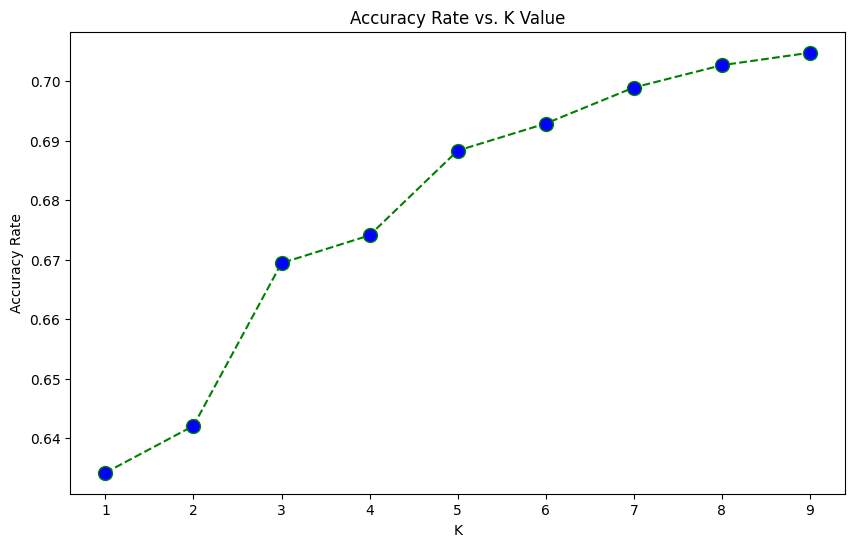

In [18]:
accuracy_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, df['Cardiovascular_Disease'], cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))

plt.plot(range(1,10), accuracy_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Accuracy: ', knn.score(X_test, y_test))

Accuracy:  0.7107371391142238
